In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

In [3]:
# load dataset
df=pd.read_csv('train.csv')

In [4]:
df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198


In [4]:
df['stock_id'].value_counts()

stock_id
0      26455
137    26455
127    26455
128    26455
129    26455
       ...  
153    22605
199    21615
79     16500
135    15950
102    10230
Name: count, Length: 200, dtype: int64

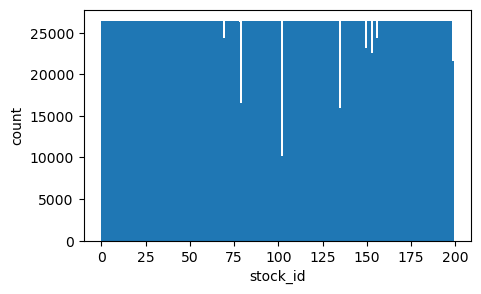

In [11]:
plt.figure(figsize=(5,3))
df['stock_id'].plot.hist(bins=200)   
# bins = int(np.sqrt(df.shape[0])) 
# bins = df['age'].nunique()
plt.xlabel('stock_id')
plt.ylabel('count')
plt.show()

In [16]:
df['date_id'].value_counts()

date_id
480    11000
353    11000
363    11000
362    11000
360    11000
       ...  
4      10560
2      10505
1      10505
3      10505
0      10505
Name: count, Length: 481, dtype: int64

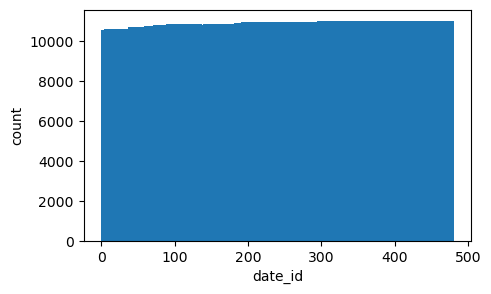

In [18]:
plt.figure(figsize=(5,3))
df['date_id'].plot.hist(bins=df['date_id'].nunique())   
# bins = int(np.sqrt(df.shape[0])) 
# bins = df['age'].nunique()
plt.xlabel('date_id')
plt.ylabel('count')
plt.show()

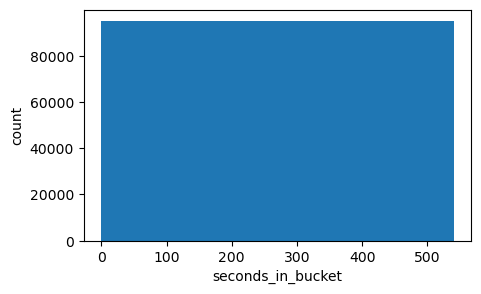

In [20]:
plt.figure(figsize=(5,3))
df['seconds_in_bucket'].plot.hist(bins=df['seconds_in_bucket'].nunique())   
# bins = int(np.sqrt(df.shape[0])) 
# bins = df['age'].nunique()
plt.xlabel('seconds_in_bucket')
plt.ylabel('count')
plt.show()

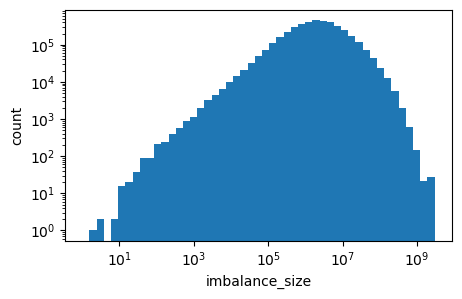

In [24]:
plt.figure(figsize=(5,3))
df['imbalance_size'].plot.hist(log=True, bins = np.logspace(np.log10(1),np.log10(np.max(df['imbalance_size'])),50))   
# bins = int(np.sqrt(df.shape[0])) 
# bins = df['age'].nunique()
plt.semilogy()
plt.semilogx()
plt.xlabel('imbalance_size')
plt.ylabel('count')
plt.show()

In [25]:
print(df['imbalance_buy_sell_flag'].value_counts())

imbalance_buy_sell_flag
-1    2084349
 1    2022037
 0    1131594
Name: count, dtype: int64


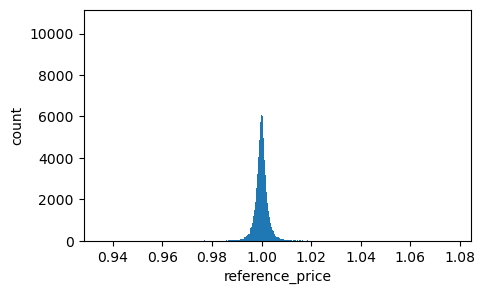

In [30]:
plt.figure(figsize=(5,3))
df['reference_price'].plot.hist(bins = df['reference_price'].nunique())
plt.xlabel('reference_price')
plt.ylabel('count')
plt.show()

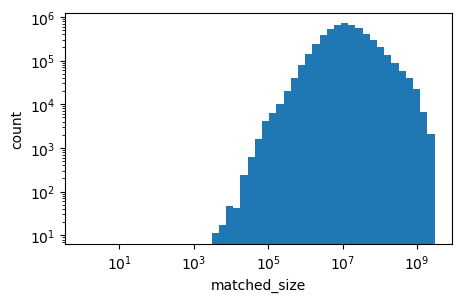

In [14]:
plt.figure(figsize=(5,3))
df['matched_size'].plot.hist(log=True, bins = np.logspace(np.log10(1),np.log10(np.max(df['imbalance_size'])),50)) # bins = df['matched_size'].nunique()
plt.semilogx()
plt.semilogy()
plt.xlabel('matched_size')
plt.ylabel('count')
plt.show()

<Axes: >

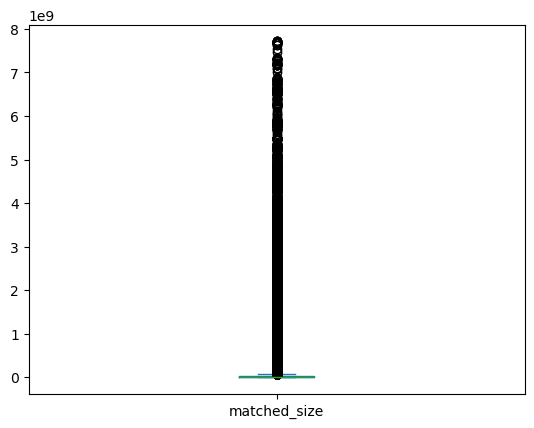

In [16]:
# plt.violinplot(df['matched_size'])
df['matched_size'].plot.box()

In [18]:

df_stock_0_0=df[(df['stock_id']==0)&(df['date_id']==0)]
df_stock_0_0

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
191,0,0,10,1299772.70,1,1.000026,15261106.63,NaN,NaN,0.999812,13996.50,1.000026,23519.16,0.999892,0.389814,1,0_10_0
382,0,0,20,1299772.70,1,0.999919,15261106.63,NaN,NaN,0.999812,4665.50,0.999919,12131.60,0.999842,4.220009,2,0_20_0
573,0,0,30,1299772.70,1,1.000133,15261106.63,NaN,NaN,1.000026,55998.00,1.000133,46203.30,1.000085,5.450249,3,0_30_0
764,0,0,40,1218204.43,1,1.000455,15342674.90,NaN,NaN,1.000241,14655.95,1.000455,26610.45,1.000317,3.169775,4,0_40_0
955,0,0,50,1218204.43,1,1.000455,15342674.90,NaN,NaN,1.000348,42012.00,1.000455,9897.22,1.000434,0.599623,5,0_50_0
1146,0,0,60,1218204.43,1,1.000562,15342674.90,NaN,NaN,1.000455,14005.50,1.000562,10085.04,1.000517,-0.200272,6,0_60_0
1337,0,0,70,1264494.89,1,1.000455,15352380.96,NaN,NaN,1.000348,37904.16,1.000455,17366.82,1.000421,2.410412,7,0_70_0
1528,0,0,80,1189832.86,1,1.000241,15427043.00,NaN,NaN,1.000133,9427.34,1.000241,61984.40,1.000148,-0.389814,8,0_80_0
1719,0,0,90,1189272.89,1,1.000562,15427602.97,NaN,NaN,1.000348,23340.00,1.000562,40433.54,1.000426,-4.339814,9,0_90_0


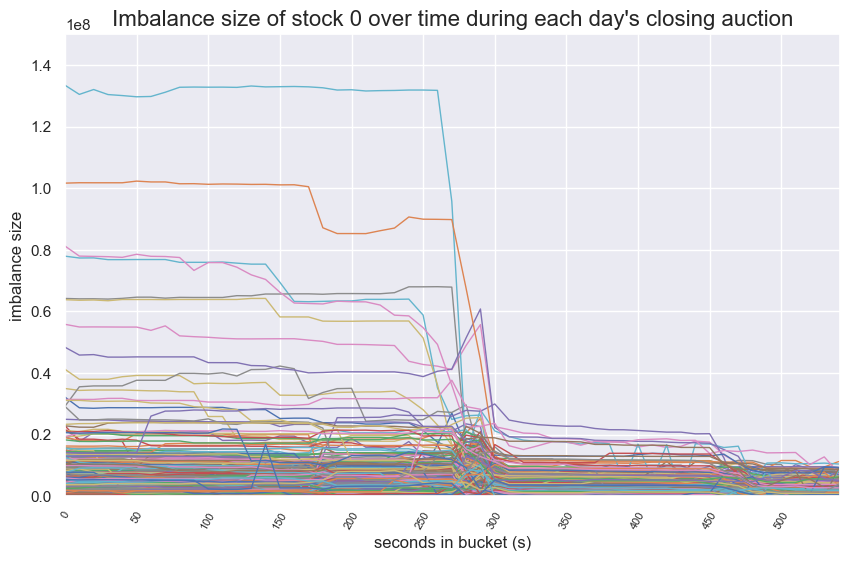

In [41]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")

for i in range(0,481,1):
    df_stock_date=df[(df['stock_id']==0)&(df['date_id']==i)]
    sns.lineplot(data=df_stock_date, x='seconds_in_bucket', y='imbalance_size',lw=1)
plt.title('Imbalance size of stock 0 over time during each day\'s closing auction', fontsize=16)
plt.xlim(0,541)
plt.ylim(0,1.5e8)
plt.xticks(np.arange(0, 541, 50),rotation=60, fontsize=8)
plt.xlabel('seconds in bucket (s)', fontsize=12)
plt.ylabel('imbalance size', fontsize=12)
plt.show()

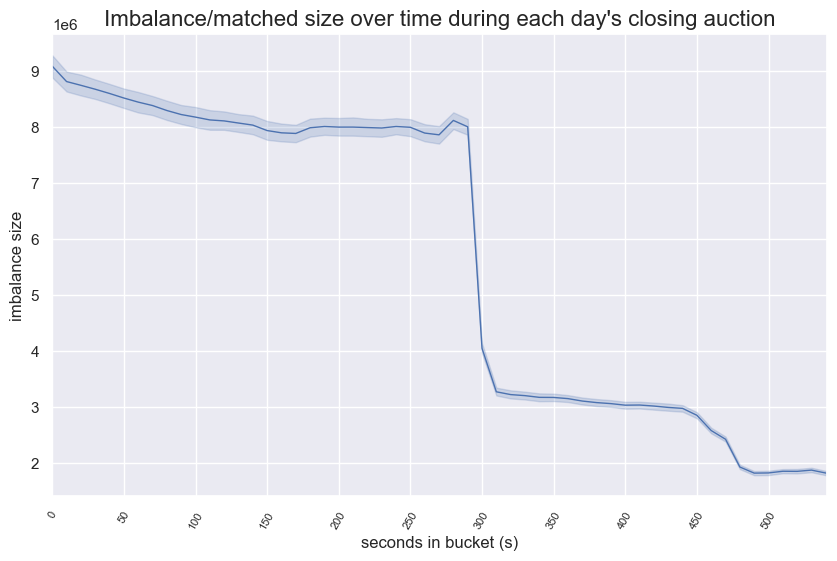

In [59]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")

# for i in range(0,481,1):
# df_stock_0=df[(df['stock_id']==0)]
sns.lineplot(data=df, x='seconds_in_bucket', y='imbalance_size',lw=1)
plt.title('Imbalance size over time during each day\'s closing auction', fontsize=16)
plt.xlim(0,541)
plt.xticks(np.arange(0, 541, 50),rotation=60, fontsize=8)
plt.xlabel('seconds in bucket (s)', fontsize=12)
plt.ylabel('imbalance size', fontsize=12)
plt.show()

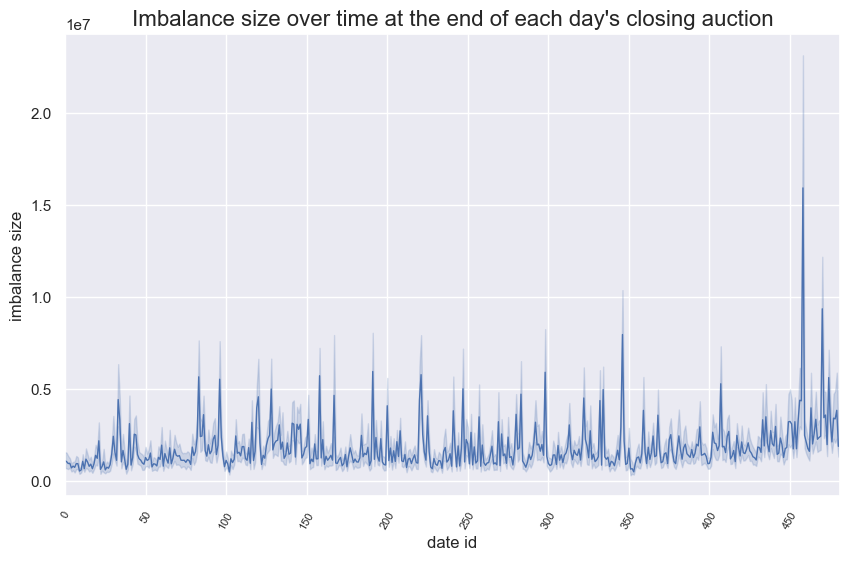

In [74]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")

# for i in range(0,481,1):
df_stock_0=df[(df['stock_id']==0)]
sns.lineplot(data=df[df['seconds_in_bucket']==540], x='date_id', y='imbalance_size',lw=1)
plt.title('Imbalance size over time at the end of each day\'s closing auction', fontsize=16)
plt.xlim(0,481)
plt.xticks(np.arange(0, 481, 50),rotation=60, fontsize=8)
plt.xlabel('date id', fontsize=12)
plt.ylabel('imbalance size', fontsize=12)
plt.show()

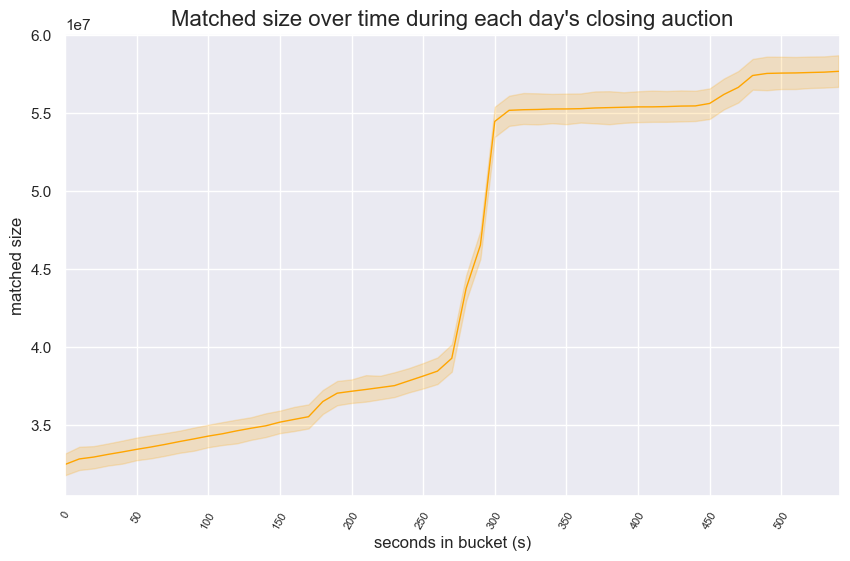

In [61]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")

# for i in range(0,481,1):
df_stock_0=df[(df['stock_id']==0)]
sns.lineplot(data=df, x='seconds_in_bucket', y='matched_size',lw=1, color='orange')
plt.title('Matched size over time during each day\'s closing auction', fontsize=16)
plt.xlim(0,541)
plt.xticks(np.arange(0, 541, 50),rotation=60, fontsize=8)
plt.xlabel('seconds in bucket (s)', fontsize=12)
plt.ylabel('matched size', fontsize=12)
plt.show()

In [ ]:
df[]

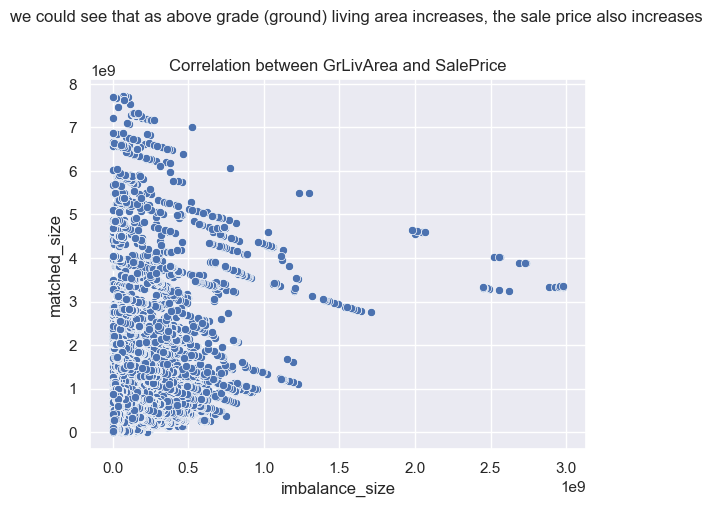

In [13]:
sns.scatterplot(data=df, x='imbalance_size', y='matched_size')
plt.title('Correlation between GrLivArea and SalePrice')
plt.xlabel('imbalance_size')
plt.ylabel('matched_size')
plt.figtext(0,1,'we could see that as above grade (ground) living area increases, the sale price also increases')
plt.show()

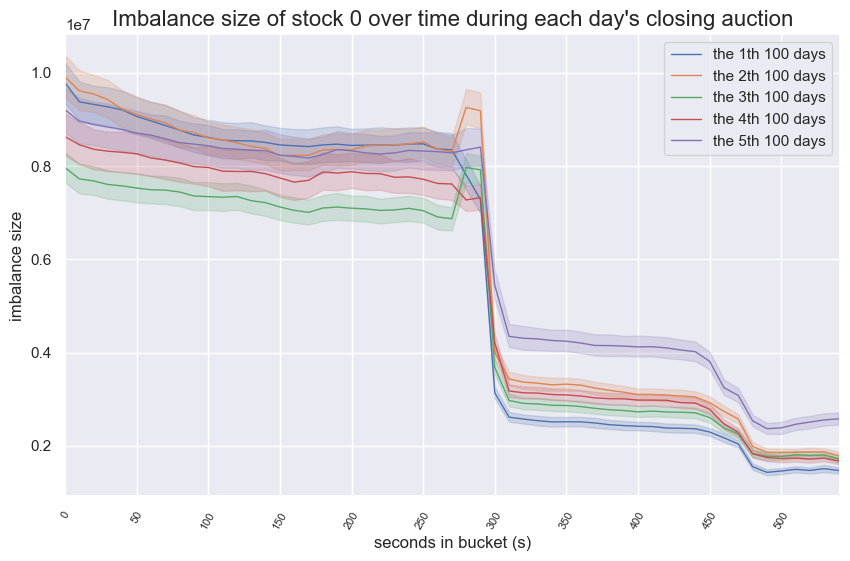

In [56]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")

n=100
for i in range(0,481,n):
    df_stock_0=df[(df['date_id']<i+n)&(df['date_id']>=i)]
    sns.lineplot(data=df_stock_0, x='seconds_in_bucket', y='imbalance_size',lw=1,label=f'the {int(i/n)+1}th {n} days')
plt.title('Imbalance size of stock 0 over time during each day\'s closing auction', fontsize=16)
plt.xlim(0,541)
plt.xticks(np.arange(0, 541, 50),rotation=60, fontsize=8)
plt.xlabel('seconds in bucket (s)', fontsize=12)
plt.ylabel('imbalance size', fontsize=12)
plt.show()

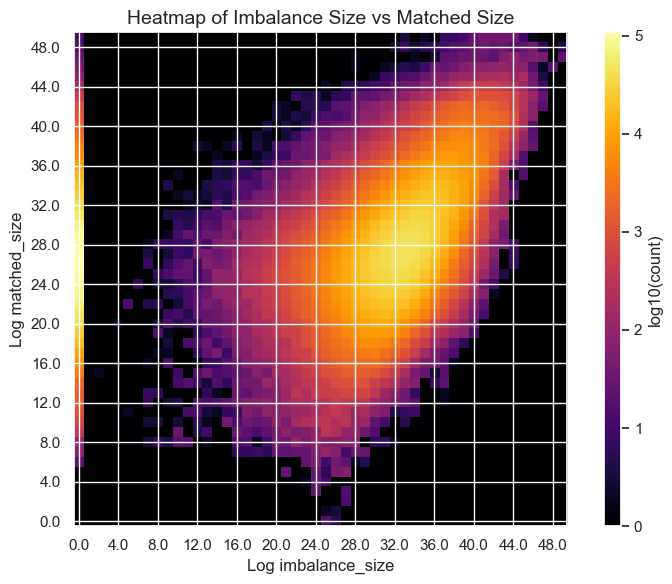

In [49]:
nbins = 50
df_imbalance_matched=df[['imbalance_size','matched_size']].dropna()

# df_x = df['imbalance_size'].dropna()
# df_y = df['matched_size'].dropna()
df_x_log = np.log10(df_imbalance_matched['imbalance_size']+1)
df_y_log = np.log10(df_imbalance_matched['matched_size']+1)

heatmap, xedges, yedges = np.histogram2d(df_x_log, df_y_log, bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap[heatmap == 0] = 0.1

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(np.log10(heatmap).T, origin='lower', vmin=0, cmap='inferno')
# Create a formatter to display tick labels with one decimal place
formatter = ticker.FormatStrFormatter('%.1f')
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)

ax.set_xlabel('Log imbalance_size', fontsize=12)
ax.set_ylabel('Log matched_size', fontsize=12)
ax.set_xticks(np.arange(nbins + 1)[::4])
ax.set_yticks(np.arange(nbins + 1)[::4])
ax.set_title('Heatmap of Imbalance Size vs Matched Size', fontsize=14)
fig.colorbar(im, label='log10(count)', aspect=30)

plt.tight_layout()
plt.show()

In [65]:
df_1=df.copy()
df_1['imbalance_min_stock_date_col']=df_1.groupby(['stock_id','date_id'])['imbalance_size'].transform('min')
df_1['imbalance_max_stock_date_col']=df_1.groupby(['stock_id','date_id'])['imbalance_size'].transform('min')
df_1['matched_min_stock_date_col']=df_1.groupby(['stock_id','date_id'])['matched_size'].transform('min')
df_1['matched_msx_stock_date_col']=df_1.groupby(['stock_id','date_id'])['matched_size'].transform('min')

def cal(x, min_x, max_x):
    return (x - min_x) / (max_x - min_x)

df_1['imbalance_stock_date_col'] = df_1.apply(lambda row: cal(row['matched_size'], row['matched_min_stock_date_col'], row['imbalance_max_stock_date_col']), axis=1)
df_1['matched_stock_date_col'] = df_1.apply(lambda row: cal(row['matched_size'], row['matched_min_stock_date_col'], row['imbalance_max_stock_date_col']), axis=1)
df_1


,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,...,wap,target,time_id,row_id,imbalance_min_stock_date_col,imbalance_max_stock_date_col,matched_min_stock_date_col,matched_msx_stock_date_col,imbalance_stock_date_col,matched_stock_date_col
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,...,1.000000,-3.029704,0,0_0_0,0.00,0.00,13380276.64,13380276.64,-0.000000,-0.000000
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,...,1.000000,-5.519986,0,0_0_1,0.00,0.00,1634726.44,1634726.44,-0.004580,-0.004580
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,...,1.000000,-8.389950,0,0_0_2,0.00,0.00,1819368.03,1819368.03,-0.000000,-0.000000
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,...,1.000000,-4.010200,0,0_0_3,492879.31,492879.31,18389745.62,18389745.62,-0.000000,-0.000000
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,...,1.000000,-7.349849,0,0_0_4,0.00,0.00,17860614.95,17860614.95,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,...,1.000328,2.310276,26454,480_540_195,0.00,0.00,7956041.37,7956041.37,-2.554577,-2.554577
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,...,1.000819,-8.220077,26454,480_540_196,8245.74,8245.74,2367616.44,2367616.44,-2.890636,-2.890636
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,...,0.995797,1.169443,26454,480_540_197,0.00,0.00,3780215.00,3780215.00,-2.366326,-2.366326
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,...,0.999008,-1.540184,26454,480_540_198,0.00,0.00,61501140.80,61501140.80,-0.541000,-0.541000


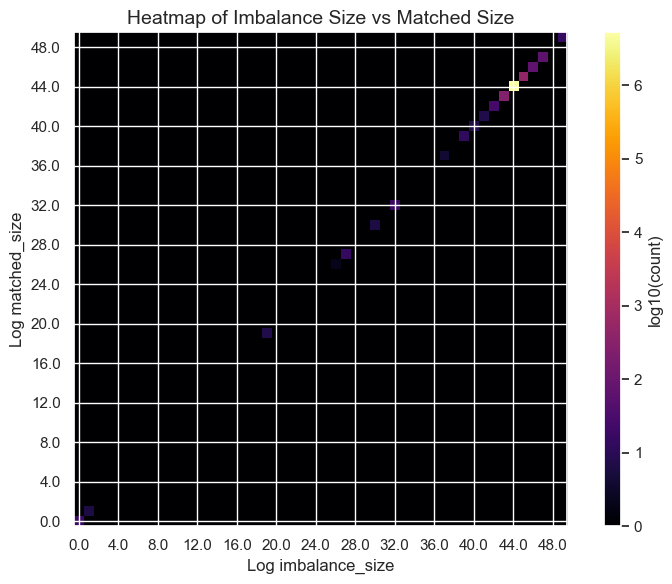

In [75]:
nbins = 50
df_imbalance_matched=df_1[['imbalance_stock_date_col','matched_stock_date_col']].dropna()
df_x = df_imbalance_matched['imbalance_stock_date_col']
df_y = df_imbalance_matched['matched_stock_date_col']
# df_x_log = np.log10(df_imbalance_matched['imbalance_stock_date_col']+1)
# df_y_log = np.log10(df_imbalance_matched['matched_stock_date_col']+1)

heatmap, xedges, yedges = np.histogram2d(df_x, df_y, bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap[heatmap == 0] = 0.1

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(np.log10(heatmap).T, origin='lower', vmin=0, cmap='inferno')
# Create a formatter to display tick labels with one decimal place
formatter = ticker.FormatStrFormatter('%.1f')
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)

ax.set_xlabel('Log imbalance_size', fontsize=12)
ax.set_ylabel('Log matched_size', fontsize=12)
ax.set_xticks(np.arange(nbins + 1)[::4])
ax.set_yticks(np.arange(nbins + 1)[::4])
ax.set_title('Heatmap of Imbalance Size vs Matched Size', fontsize=14)
fig.colorbar(im, label='log10(count)', aspect=30)

plt.tight_layout()
plt.show()

In [72]:
df_imbalance_matched.dropna()
rows_with_nan = df_imbalance_matched[df_imbalance_matched.isna().any(axis=1)]
rows_with_nan

,imbalance_stock_date_col,matched_stock_date_col


In [63]:
df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198


<Axes: ylabel='matched_size'>

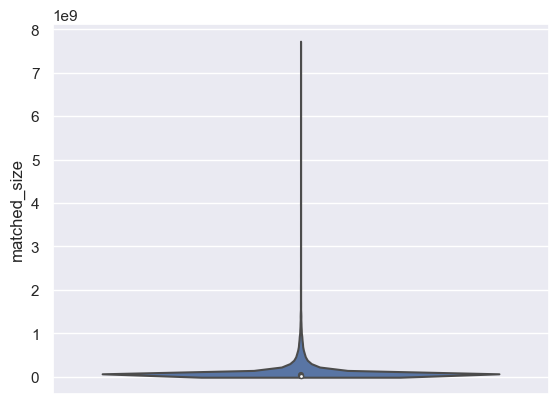

In [28]:
sns.violinplot(y='matched_size', data=df)

In [84]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")

# for i in range(0,481,1):
df_stock_0=df[(df['stock_id']==0)]
sns.lineplot(data=df, x='seconds_in_bucket', y='far_price',lw=1,label='far_price')
sns.lineplot(data=df, x='seconds_in_bucket', y='near_price',lw=1,label='near_price')
plt.title('far price over time during each day\'s closing auction', fontsize=16)
# plt.xlim(0,541)
# plt.xticks(np.arange(0, 541, 50),rotation=60, fontsize=8)
plt.xlabel('seconds in bucket (s)', fontsize=12)
plt.ylabel('imbalance size', fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")

# for i in range(0,481,1):
df_stock_0=df[(df['stock_id']==0)]
sns.lineplot(data=df, x='seconds_in_bucket', y='matched_size',lw=1, color='orange')
plt.title('Matched size over time during each day\'s closing auction', fontsize=16)
plt.xlim(0,541)
plt.xticks(np.arange(0, 541, 50),rotation=60, fontsize=8)
plt.xlabel('seconds in bucket (s)', fontsize=12)
plt.ylabel('matched size', fontsize=12)
plt.show()

<Axes: ylabel='target'>

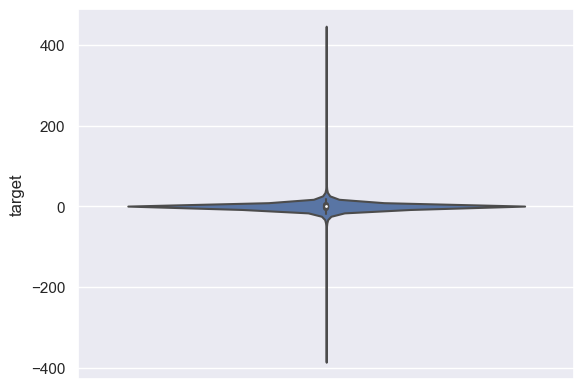

In [82]:
sns.violinplot(y='target', data=df)

<Axes: ylabel='bid_size'>

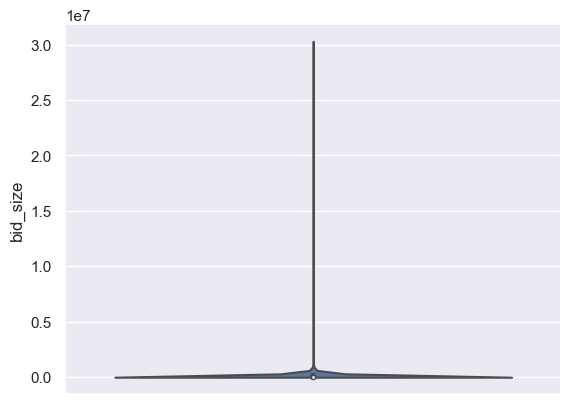

In [55]:
sns.violinplot(y='bid_size', data=df)

<Axes: >

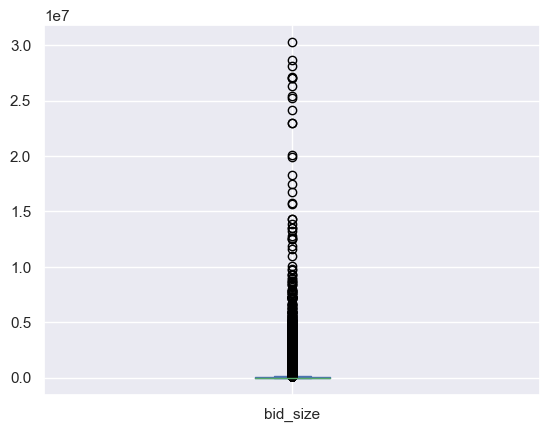

In [56]:
df['bid_size'].plot.box()

<Axes: ylabel='wap'>

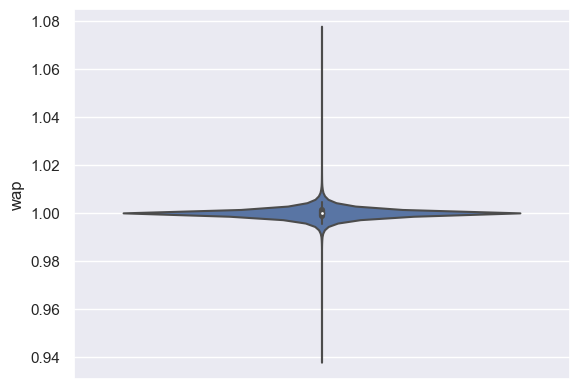

In [9]:
sns.violinplot(y='wap', data=df)

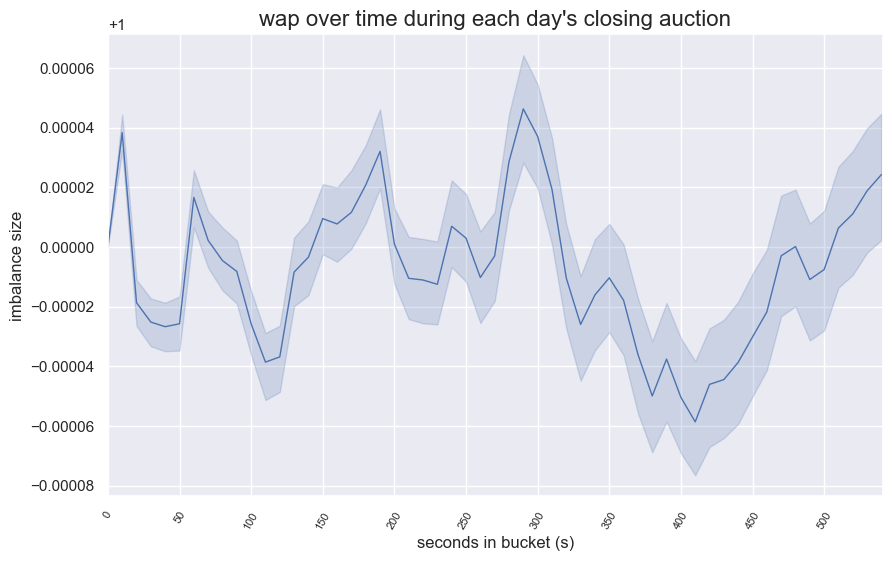

In [8]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")

# for i in range(0,481,1):
df_stock_0=df[(df['stock_id']==0)]
sns.lineplot(data=df, x='seconds_in_bucket', y='wap',lw=1)
plt.title('wap over time during each day\'s closing auction', fontsize=16)
plt.xlim(0,541)
plt.xticks(np.arange(0, 541, 50),rotation=60, fontsize=8)
plt.xlabel('seconds in bucket (s)', fontsize=12)
plt.ylabel('imbalance size', fontsize=12)
plt.show()

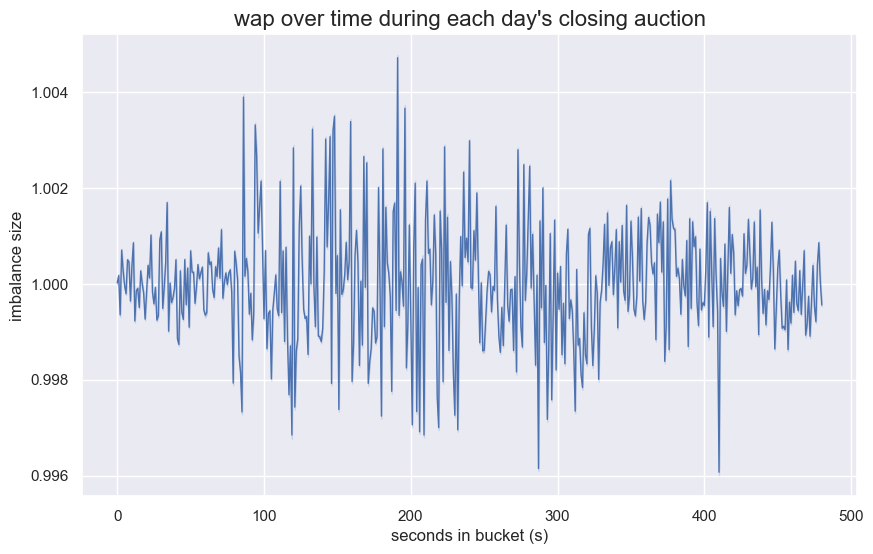

In [7]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")

# for i in range(0,481,1):
df_stock_0=df[(df['stock_id']==0)]
sns.lineplot(data=df, x='date_id', y='wap',lw=1)
plt.title('wap over time during each day\'s closing auction', fontsize=16)
# plt.xlim(0,541)
# plt.xticks(np.arange(0, 541, 50),rotation=60, fontsize=8)
plt.xlabel('seconds in bucket (s)', fontsize=12)
plt.ylabel('imbalance size', fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")

vars=['bid_price','ask_price','bid_size','ask_size']
# for i in range(0,481,1):
df_stock_0=df[(df['stock_id']==0)]
sns.lineplot(data=df, x='seconds_in_bucket', y='wap',lw=1)
plt.title('wap over time during each day\'s closing auction', fontsize=16)
plt.xlim(0,541)
plt.xticks(np.arange(0, 541, 50),rotation=60, fontsize=8)
plt.xlabel('seconds in bucket (s)', fontsize=12)
plt.ylabel('imbalance size', fontsize=12)
plt.show()

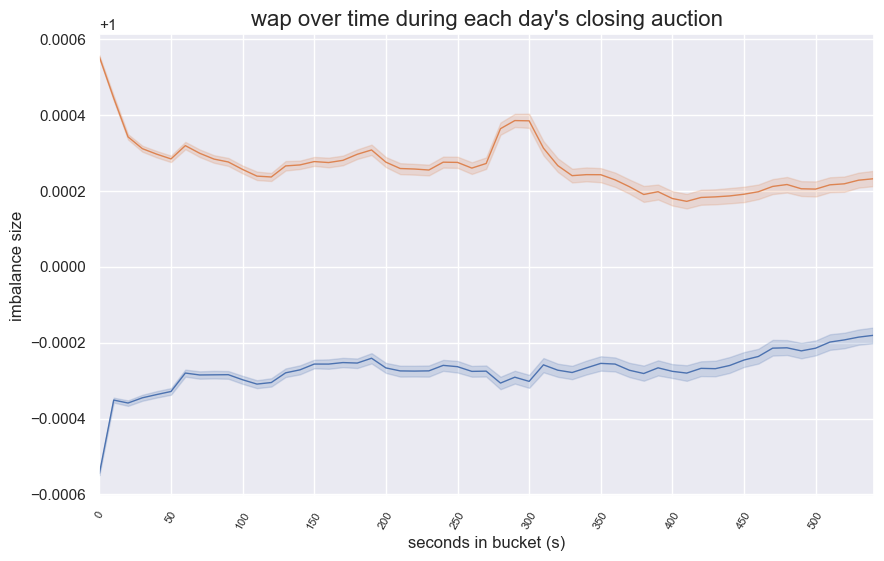

In [48]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=df, x='seconds_in_bucket', y='bid_price',lw=1)
sns.lineplot(data=df, x='seconds_in_bucket', y='ask_price',lw=1)
plt.title('wap over time during each day\'s closing auction', fontsize=16)
plt.xlim(0,541)
plt.xticks(np.arange(0, 541, 50),rotation=60, fontsize=8)
plt.xlabel('seconds in bucket (s)', fontsize=12)
plt.ylabel('imbalance size', fontsize=12)
plt.show()

/Users/kzzzz/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


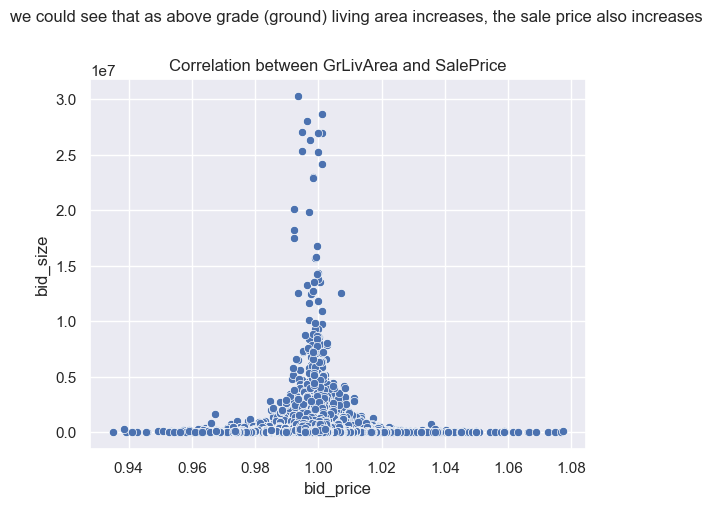

In [8]:
df_1=df.copy()
df_1['log_bid_price'] = np.log(df['bid_price'])
df_1['log_bid_size'] = np.log(df['bid_size'])

sns.scatterplot(data=df, x='bid_price', y='bid_size')
plt.title('Correlation between GrLivArea and SalePrice')
plt.xlabel('bid_price')
plt.ylabel('bid_size')
plt.figtext(0,1,'we could see that as above grade (ground) living area increases, the sale price also increases')
plt.show()

<Axes: ylabel='log_bid_price'>

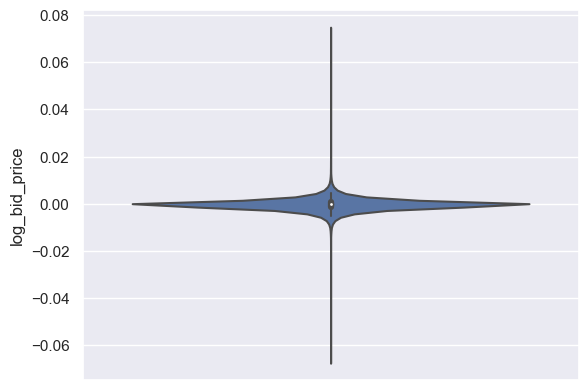

In [9]:
sns.violinplot(y='log_bid_price', data=df_1)

In [10]:
sns.violinplot(y='log_bid_size', data=df_1)

/Users/kzzzz/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/numpy/lib/function_base.py:2699: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


ValueError: array must not contain infs or NaNs

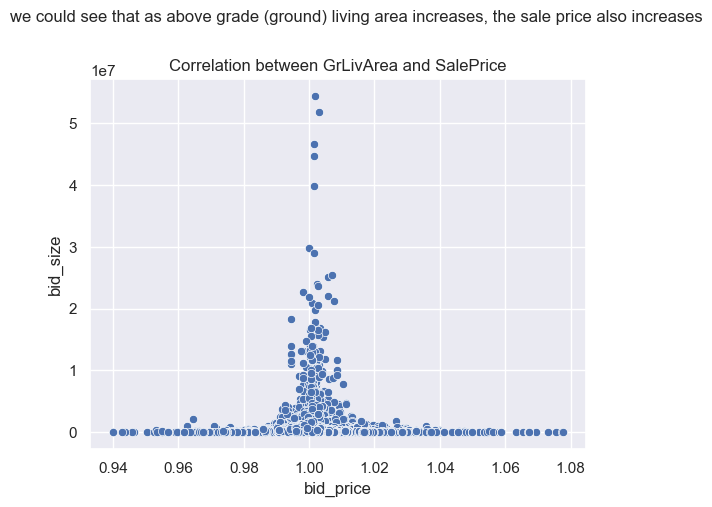

In [103]:
sns.scatterplot(data=df, x='ask_price', y='ask_size')
plt.title('Correlation between GrLivArea and SalePrice')
plt.xlabel('bid_price')
plt.ylabel('bid_size')
plt.figtext(0,1,'we could see that as above grade (ground) living area increases, the sale price also increases')
plt.show()

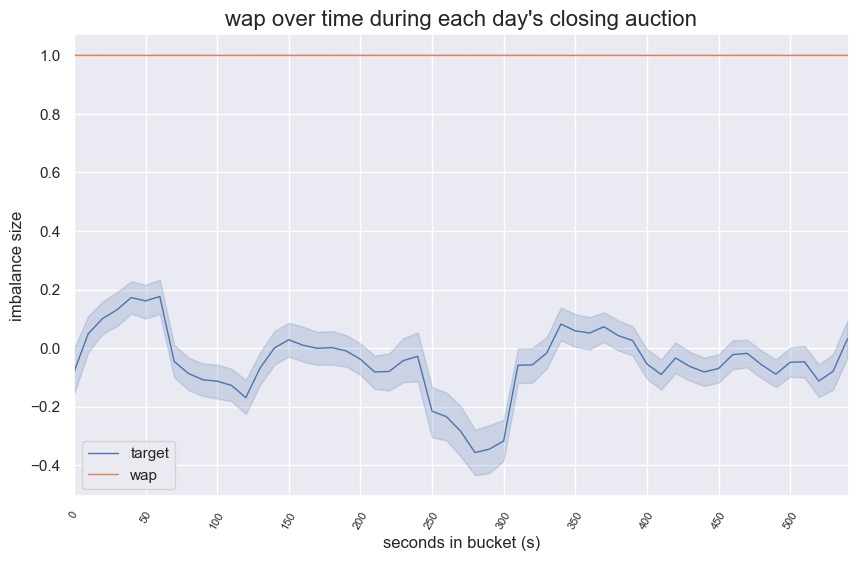

In [81]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=df, x='seconds_in_bucket', y='target',lw=1,label='target')
sns.lineplot(data=df, x='seconds_in_bucket', y='wap',lw=1,label='wap')
plt.title('wap over time during each day\'s closing auction', fontsize=16)
plt.xlim(0,541)
plt.xticks(np.arange(0, 541, 50),rotation=60, fontsize=8)
plt.xlabel('seconds in bucket (s)', fontsize=12)
plt.ylabel('imbalance size', fontsize=12)
plt.show()

/Users/kzzzz/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/kzzzz/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


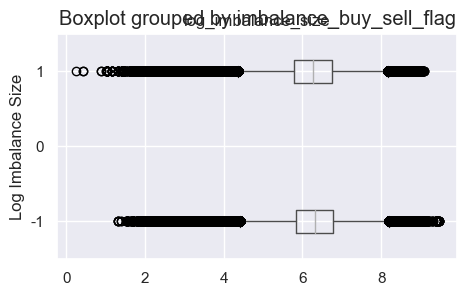

In [80]:
# Transform 'imbalance_size' into log scale
df['log_imbalance_size'] = np.log10(df['imbalance_size'])

# Create the boxplot
df[['log_imbalance_size', 'imbalance_buy_sell_flag']].boxplot(by='imbalance_buy_sell_flag', figsize=(5, 3), vert=False)

# Set the y-label
plt.ylabel('Log Imbalance Size')

# Show the plot
plt.show()

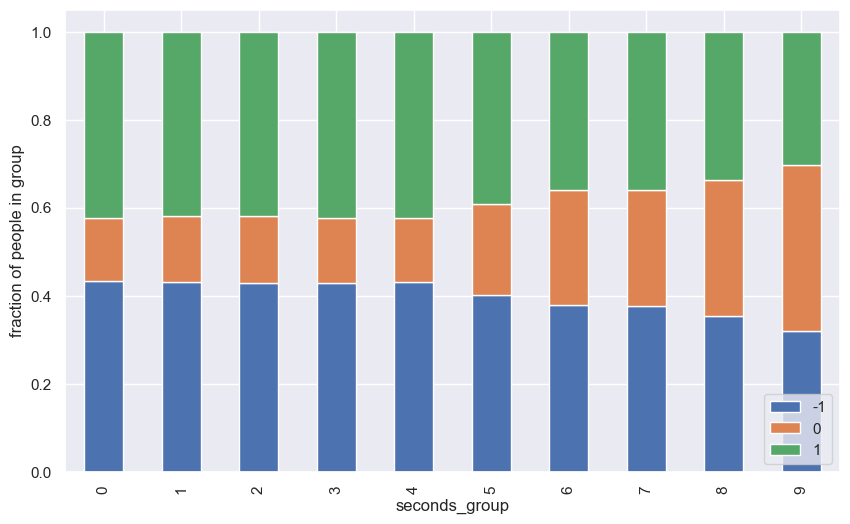

In [99]:
# count of imbalance_buy_sell_flag over time
df_1=df.copy()
df_1['seconds_group'] = pd.cut(df['seconds_in_bucket'], bins=10, labels=False)
count_matrix = df_1.groupby(['seconds_group', 'imbalance_buy_sell_flag']).size().unstack()
# print(count_matrix)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(10,6))
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

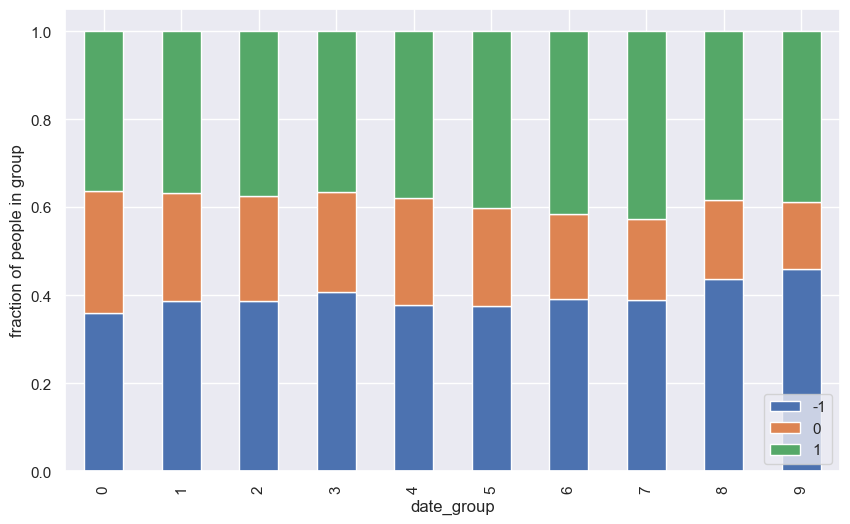

In [100]:
df_1=df.copy()
df_1['date_group'] = pd.cut(df['date_id'], bins=10, labels=False)
count_matrix = df_1.groupby(['date_group', 'imbalance_buy_sell_flag']).size().unstack()
# print(count_matrix)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(10,6))
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

In [95]:
temp = pd.cut(df['seconds_in_bucket'], bins=10, labels=False)
temp

0          0
1          0
2          0
3          0
4          0
          ..
5237975    9
5237976    9
5237977    9
5237978    9
5237979    9
Name: seconds_in_bucket, Length: 5237980, dtype: int64

In [96]:
temp.value_counts()

seconds_in_bucket
0    571416
2    571416
4    571416
7    571416
9    571416
1    476180
3    476180
5    476180
6    476180
8    476180
Name: count, dtype: int64

In [97]:
sum(temp.isna())

0